Link dataset   :https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

Masalah utama yang dibahas dataset ini adalah prediksi penyakit jantung pada pasien berdasarkan atribut medis mereka. Penyakit jantung adalah penyebab utama kematian secara global, dan deteksi dini dapat secara signifikan meningkatkan hasil kesehatan pasien.

Tantangannya adalah mengembangkan model pembelajaran mesin yang dapat memprediksi secara akurat apakah seorang pasien memiliki penyakit jantung berdasarkan informasi medis dan demografis mereka. Ini adalah masalah klasifikasi biner di mana model perlu menghasilkan output 0 (tidak ada penyakit jantung) atau 1 (ada penyakit jantung).

In [ ]:
#import Library

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
-data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

# Menampilkan shape dari data yg kita punya
print('dataset:', (str(data.shape)))

data

dataset: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Data pre_Processing**

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


<Axes: ylabel='count'>

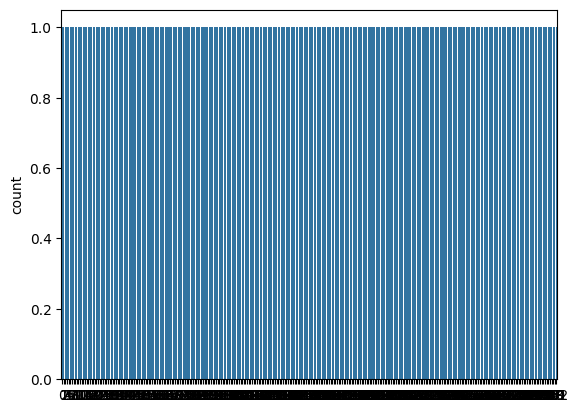

In [ ]:
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

sns.countplot(y)

# **Berdasarkan pengujian diatas, Dataset yang saya pakai tidak memiliki missing data dan balance sehingga dapat langsung dipakai untuk permodelan**

# **Split Features(X) dan target(Y)**

In [ ]:
X = data.drop('output', axis=1)
y = data['output']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (303, 13)
Shape of y: (303,)


# **Normalisasi data**
K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut.
Oleh karena itu, saya melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


# **Splitting Data**
Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik

Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Kali ini kita membagi dataset dengan komposisi **sebesar 80% data training dan 20% data testing.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train set :" , X_train.shape, y_train.shape)
print("Test set  :" , X_test.shape, y_test.shape)

Train set : (242, 13) (242,)
Test set  : (61, 13) (61,)


# **Modeling: Klasifikasi k-Nearest Neighbor (k-NN)**


**Training Model**

Pertama, tentukan nilai k. saya coba dengan nilai k=5:

In [ ]:
k = 5  # number of neighbors
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting**

Kita sudah dapat menggunakan model yang telah di-training untuk **memprediksikan data**

In [ ]:
y_pred = model_knn.predict(X_test)
print("Hasil prediksi:")
print(y_pred)

Hasil prediksi:
[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan:

membandingkan kelas **hasil prediksi model** dengan **kelas sebenarnya/actual class**.

In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Train set Accuracy :  0.8636363636363636
Test set Accuracy :  0.9180327868852459
Accuracy: 0.92


Accuracy train set dan test set tidak terpaut jauh. Accuracy keduanya juga sangat tinggi.

Bisa dikatakan model dengan k=5 sudah **Good Fit**.

# **MENCARI NILAI K TERBAIK**
Performa dari model K-NN **sangat bergantung dengan nilai K**.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1** sampai dengan **k=10**.

In [ ]:
Ks = 11
accuracies = []
precisions = []
recalls = []

# Loops dari k=1 sampai dengan k=10
for k in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors = k)

    # training model
    knn.fit(X_train, y_train)

    # membuat prediksi dari testing data
    y_hat = knn.predict(X_test)

    # menyimpan hasil pengujian
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    precisions.append(metrics.precision_score(y_test, y_hat))
    recalls.append(metrics.recall_score(y_test, y_hat))

    # cetak hasil pengujian
    print('k =', k)
    print('Accuracy =', metrics.accuracy_score(y_test, y_hat))
    print('Precision =', metrics.precision_score(y_test, y_hat))
    print('Recall =', metrics.recall_score(y_test, y_hat), '\n')


k = 1
Accuracy = 0.8524590163934426
Precision = 0.896551724137931
Recall = 0.8125 

k = 2
Accuracy = 0.819672131147541
Precision = 0.92
Recall = 0.71875 

k = 3
Accuracy = 0.8688524590163934
Precision = 0.9285714285714286
Recall = 0.8125 

k = 4
Accuracy = 0.8852459016393442
Precision = 0.9629629629629629
Recall = 0.8125 

k = 5
Accuracy = 0.9180327868852459
Precision = 0.9354838709677419
Recall = 0.90625 

k = 6
Accuracy = 0.9344262295081968
Precision = 0.9666666666666667
Recall = 0.90625 

k = 7
Accuracy = 0.9180327868852459
Precision = 0.9354838709677419
Recall = 0.90625 

k = 8
Accuracy = 0.8524590163934426
Precision = 0.9259259259259259
Recall = 0.78125 

k = 9
Accuracy = 0.8852459016393442
Precision = 0.9310344827586207
Recall = 0.84375 

k = 10
Accuracy = 0.8852459016393442
Precision = 0.9310344827586207
Recall = 0.84375 



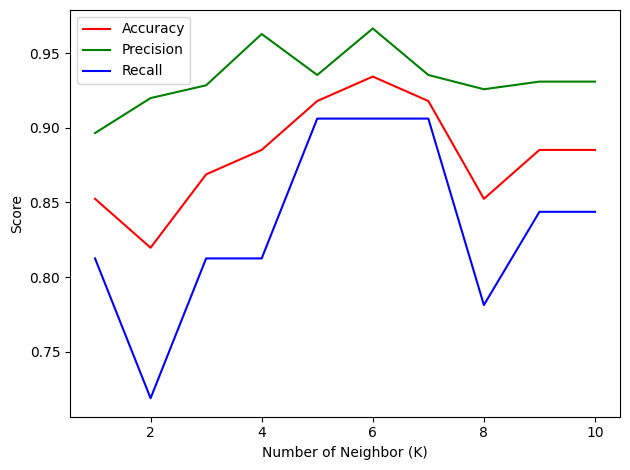

In [ ]:
#Line Chart
plt.plot(range(1, Ks), accuracies, 'r')
plt.plot(range(1, Ks), precisions, 'g')
plt.plot(range(1, Ks), recalls, 'b')
plt.legend(['Accuracy', 'Precision', 'Recall'])
plt.ylabel('Score')
plt.xlabel('Number of Neighbor (K)')
plt.tight_layout()
plt.show()

In [ ]:
max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print('Akurasi terbaik adalah      ', max_accuracy, 'dengan nilai k=', accuracies.index(max_accuracy)+1)
print('Precision terbaik adalah    ', max_precision, 'dengan nilai k=', precisions.index(max_precision)+1)
print('Recall terbaik adalah       ', max_recall, 'dengan nilai k=', recalls.index(max_recall)+1)


Akurasi terbaik adalah       0.9344262295081968 dengan nilai k= 6
Precision terbaik adalah     0.9666666666666667 dengan nilai k= 6
Recall terbaik adalah        0.90625 dengan nilai k= 5


# **Evaluasi Model k-NN dengan k Terbaik**

Berdasarkan pengujian sebelumnya ditemukan bahwa k=6 memiliki akurasi yang terbaik. Berikut evaluasi modelnya:

In [ ]:
best_k = accuracies.index(max_accuracy) + 1
print("Nilai k terbaik berdasarkan akurasi:", best_k)
# Train Model dengan k terbaik
model_knn_best = KNeighborsClassifier(n_neighbors=best_k)
model_knn_best.fit(X_train, y_train)
y_pred_best = model_knn_best.predict(X_test)

# Evaluasi model
print("Train set Accuracy (k terbaik): ", metrics.accuracy_score(y_train, model_knn_best.predict(X_train)))
print("Test set Accuracy (k terbaik): ", metrics.accuracy_score(y_test, y_pred_best))
print("Precision (k terbaik): ", metrics.precision_score(y_test, y_pred_best))
print("Recall (k terbaik): ", metrics.recall_score(y_test, y_pred_best))
print("F1 Score (k terbaik): ", metrics.f1_score(y_test, y_pred_best))


Nilai k terbaik berdasarkan akurasi: 6
Train set Accuracy (k terbaik):  0.8553719008264463
Test set Accuracy (k terbaik):  0.9344262295081968
Precision (k terbaik):  0.9666666666666667
Recall (k terbaik):  0.90625
F1 Score (k terbaik):  0.9354838709677419


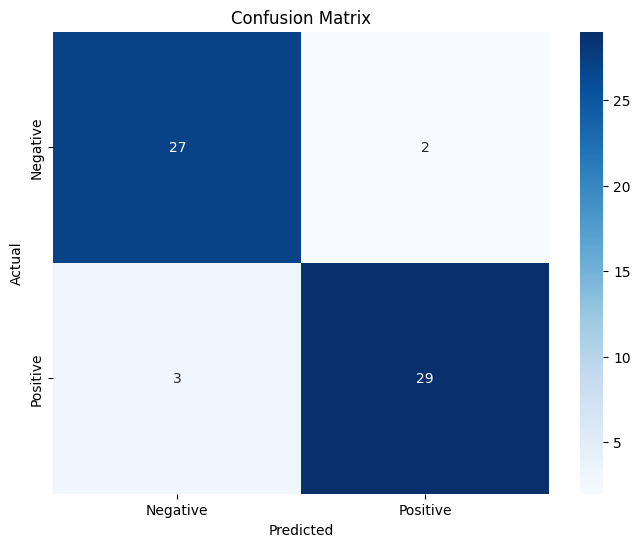

In [ ]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negative (TN): 27
Model memprediksi Negatif, dan label sebenarnya juga Negatif.
Ini berarti model mengidentifikasi 27 sampel negatif dengan benar.

False Positive (FP): 2
Model memprediksi Positif, tetapi label sebenarnya adalah Negatif.
Ada 2 kasus di mana model salah mengklasifikasikan sampel negatif sebagai positif. Ini adalah kesalahan tipe I.

False Negative (FN): 3
Model memprediksi Negatif, tetapi label sebenarnya adalah Positif.
Ada 3 kasus di mana model salah mengklasifikasikan sampel positif sebagai negatif. Ini adalah kesalahan tipe II.

True Positive (TP): 29
Model memprediksi Positif, dan label sebenarnya juga Positif.
Ini berarti model mengidentifikasi 29 sampel positif dengan benar.